# Exploratory Data Analysis (EDA) with IPUMS USA

## 1. Setup

Before running this script, you will need to install and load the following packages into your R environment:

[**corrplot**](https://cran.r-project.org/web/packages/corrplot/index.html) A package which provides a visualization of a correlation matrix.  This notebook uses the following function from *corrplot*.

* [*corrplot()*](https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html) for creating a correlation matrix visualization

[**dplyr**](https://cran.r-project.org/web/packages/dplyr/index.html) A package for data manipulation that provides a consistent set of functions to filter, arrange, summarize, and transform data. *dplyr* makes it easy to work with data frames and perform operations efficiently.  This notebook uses the the following functions from *dplyr*.

* [*arrange()*](https://dplyr.tidyverse.org/reference/arrange.html) for ordering the rows of a data frame by selected columns
* [*summarize()*](https://dplyr.tidyverse.org/reference/summarise.html) for creating a new data frame using combinations of grouping variables
* This notebook also uses [*%>%*](https://magrittr.tidyverse.org/reference/pipe.html), referred to as the *pipe* operator, which is used to pass the output from one function directly into the next function for the purpose of creating streamlined workflows.  The *pipe* operator is a commonly used component of the [*tidyverse*](https://www.tidyverse.org).

[**ggplot2**](https://cran.r-project.org/web/packages/ggplot2/index.html) A package for creating graphics based on the "Grammar of Graphics".  This notebook uses the following functions from *ggplot2*.

* [*geom_bar()*](https://ggplot2.tidyverse.org/reference/geom_bar.html) for creating bar charts
* [*geom_boxplot()*](https://ggplot2.tidyverse.org/reference/geom_boxplot.html) for creating boxplots, aka box-and-whisker plots
* [*geom_density()*](https://ggplot2.tidyverse.org/reference/geom_density.html) for creating density plots
* [*geom_histogram()*](https://ggplot2.tidyverse.org/reference/geom_histogram.html) for creating histograms
* [*geom_point()*](https://ggplot2.tidyverse.org/reference/geom_point.html) for creating scatterplots
* [*geom_vline()*](https://www.rdocumentation.org/packages/ggplot2/versions/0.9.0/topics/geom_vline) for annotating a plot with a vertical line

[**gridExtra**](https://cran.r-project.org/web/packages/gridExtra/index.html) A package which provides a number of functions to work with grid graphics such as arranging multiple plots.  This notebook uses the following functions from *gridExtra*.

* *grid.arrange()* for arranging multiple graphics on a page

[**haven**](https://cran.r-project.org/web/packages/haven/index.html) A package primairly designed for importing and exporting SPSS, Stata, and SAS files.  This notebook does not explicitly use any functions from *haven* but it is required to work with factors and view factor labels.

If you are working in the I-GUIDE environment, these packages should be already be installed.  However you will still need to load the packages into your workspace using *library* base R function.

In [42]:
#library(corrplot)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(haven)
#library(table1)

Run the following line of code to read in the "dat_analysis.rds" file.  You may need to update the file path to reflect the file's location on your machine or in your working directory.

In [53]:
dat <- readRDS("dat_analysis.rds")

In [12]:
head(dat)

STATEFIP,COUNTYFIP,SEX,AGE,AGE_CAT,RACE_RECODE,EDUC_RECODE,INCTOT,INCTOT_CAT
<int+lbl>,<dbl+lbl>,<int+lbl>,<int+lbl>,<dbl>,<fct>,<fct>,<dbl+lbl>,<fct>
1,0,2,19,2,White,"some college, no degree",-1754,"under 25,000"
1,81,2,18,2,Black,"some college, no degree",1870,"under 25,000"
1,0,1,53,4,White,high school degree or equivalent,11691,"under 25,000"
1,0,1,28,3,White,"some college, no degree",0,"under 25,000"
1,97,2,25,3,White,"some high school, no degree",0,"under 25,000"
1,0,2,30,3,White,high school degree or equivalent,0,"under 25,000"


## 1. Summary Statistics

In [13]:
summary(dat)

    STATEFIP       COUNTYFIP           SEX             AGE       
 Min.   : 1.00   Min.   :  0.00   Min.   :1.000   Min.   : 0.00  
 1st Qu.:12.00   1st Qu.:  0.00   1st Qu.:1.000   1st Qu.:22.00  
 Median :27.00   Median : 19.00   Median :2.000   Median :43.00  
 Mean   :27.76   Mean   : 50.75   Mean   :1.509   Mean   :42.34  
 3rd Qu.:42.00   3rd Qu.: 73.00   3rd Qu.:2.000   3rd Qu.:62.00  
 Max.   :56.00   Max.   :810.00   Max.   :2.000   Max.   :97.00  
                                                                 
    AGE_CAT                                  RACE_RECODE      
 Min.   :1.000   White                             :11191212  
 1st Qu.:2.000   Black                             : 1463804  
 Median :3.000   American Indian or Native American:  184752  
 Mean   :3.218   Asian or Pacific Islander         :  928923  
 3rd Qu.:4.000   Other Race                        :  754861  
 Max.   :5.000   Two or More Races                 : 1197571  
                               

In [82]:
mean(dat$AGE)
median(dat$AGE)
sd(dat$AGE)
min(dat$AGE)
max(dat$AGE)

[1] 42.33693

[1] 43

[1] 23.82725

<labelled<integer>[1]>: Age
[1] 0

Labels:
 value                                label
     0                 Less than 1 year old
    90            90 (90+ in 1980 and 1990)
   100              100 (100+ in 1960-1970)
   112 112 (112+ in the 1980 internal data)
   115 115 (115+ in the 1990 internal data)
   999                              Missing

<labelled<integer>[1]>: Age
[1] 97

Labels:
 value                                label
     0                 Less than 1 year old
    90            90 (90+ in 1980 and 1990)
   100              100 (100+ in 1960-1970)
   112 112 (112+ in the 1980 internal data)
   115 115 (115+ in the 1990 internal data)
   999                              Missing

## 2. Data Visualization

### 2a. Histograms

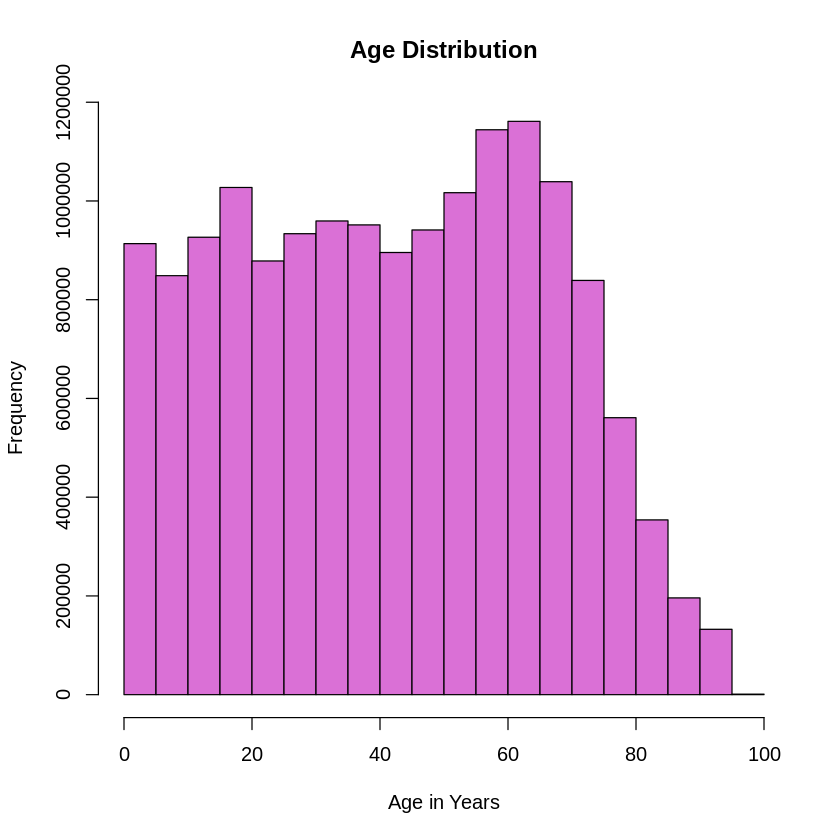

In [91]:
hist(dat$AGE,
     breaks = 25,
     main = "Age Distribution",
     xlab = "Age in Years",
     col = "orchid")     # fill color for the histogram bars

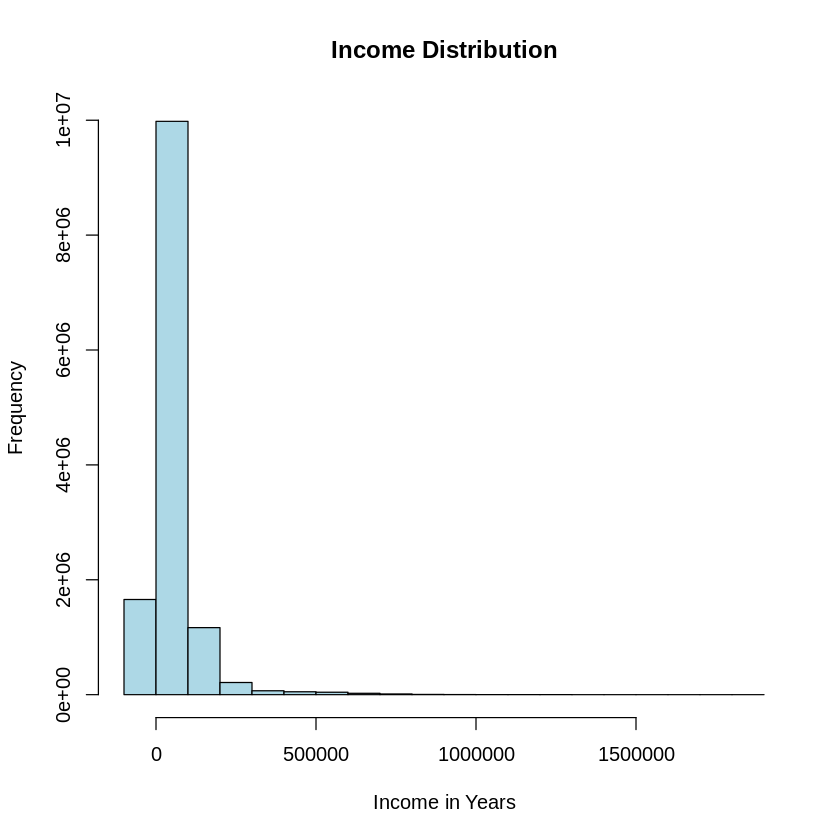

In [69]:
hist(dat$INCTOT,
     breaks = 25,
     main = "Income Distribution",
     xlab = "Income in Years",
     col = "lightblue")

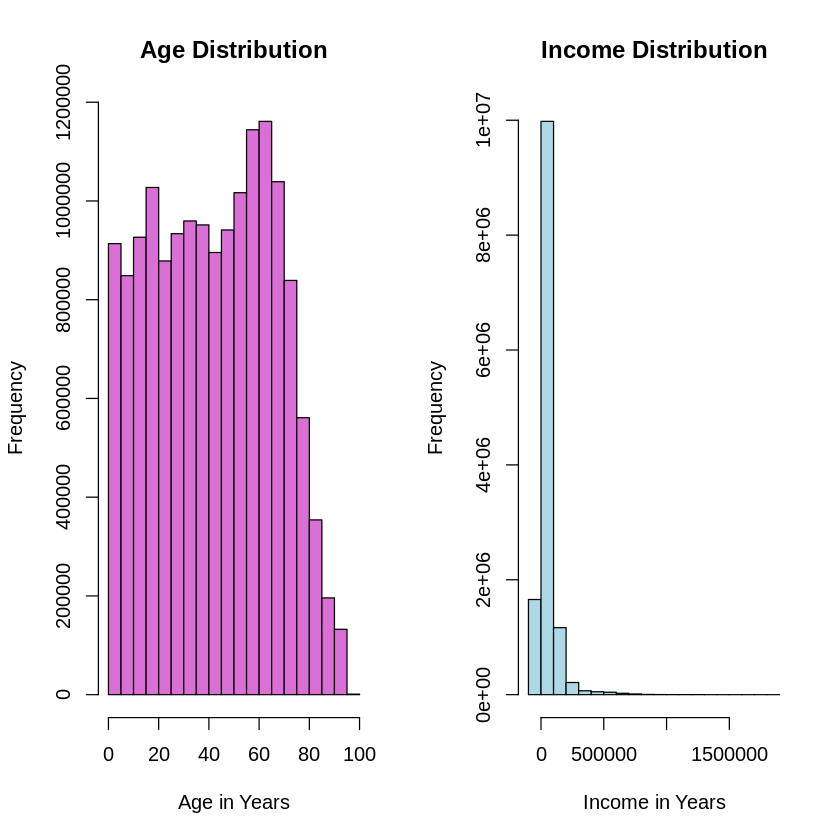

In [71]:
# set the plot space to 1 row and 2 columns
# the two histograms will appear side-by-side
par(mfrow = c(1, 2))

# histogram for age
hist(dat$AGE,
     breaks = 25,
     main = "Age Distribution",
     xlab = "Age in Years",
     col = "orchid")

# histogram for total income
hist(dat$INCTOT,
     breaks = 25,
     main = "Income Distribution",
     xlab = "Income in Years",
     col = "lightblue")

# reset the plot space back to the 1 x 1 default
par(mfrow = c(1, 1))

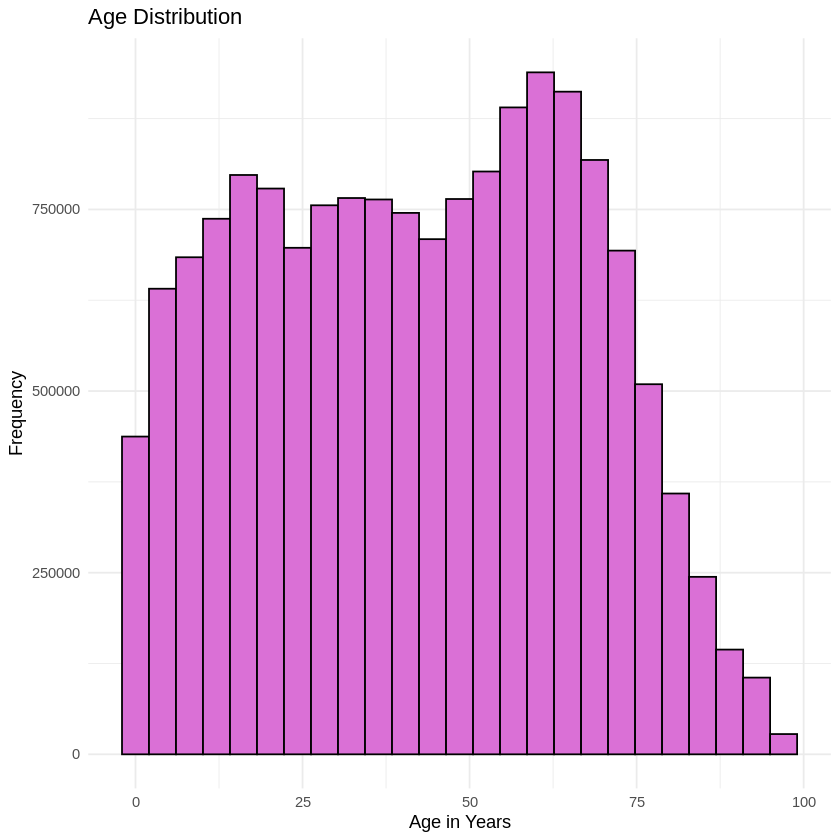

In [98]:
ggplot(dat, aes(x = AGE)) +
  geom_histogram(bins = 25,
                 fill = "orchid",       # fill color for the histogram bars
                 color = "black") +     # border color for the histogram bars
  labs(title = "Age Distribution",
       x = "Age in Years",
       y = "Frequency") +
    theme_minimal()

In [85]:
mean(dat$INCTOT, na.rm = T)
sd(dat$INCTOT, na.rm = T)

[1] 50384.38

[1] 75897.68

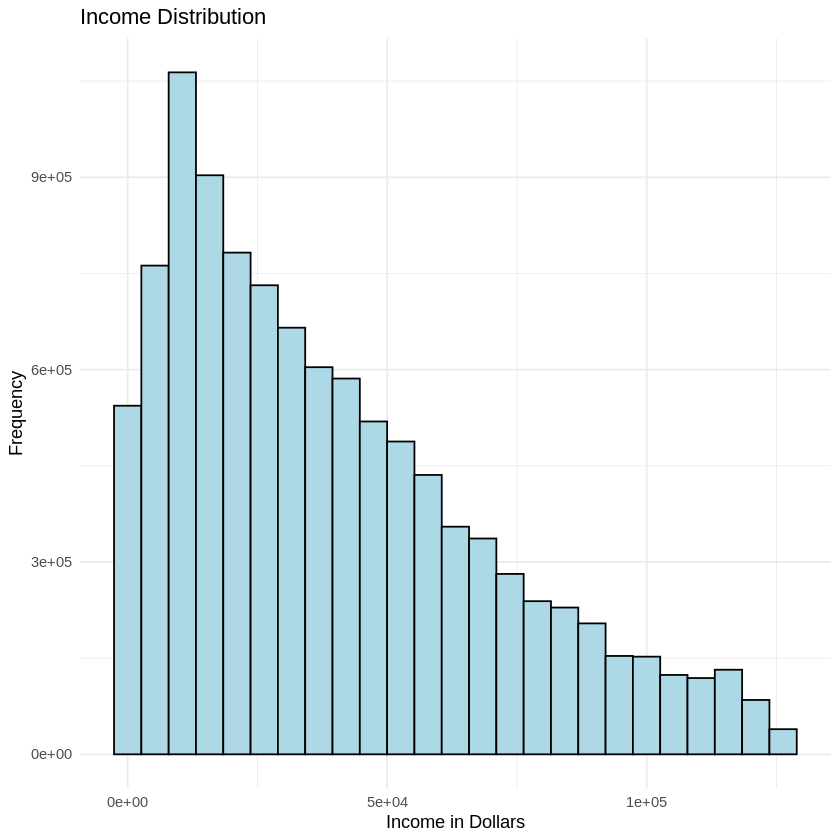

In [97]:
dat %>%
    filter(INCTOT <= mean(dat$INCTOT, na.rm = T) + sd(dat$INCTOT, na.rm = T) & INCTOT > 0) %>%
    ggplot(aes(x = INCTOT)) +
        geom_histogram(bins = 25,
                       fill = "lightblue",
                       color = "black") +
        labs(title = "Income Distribution",
             x = "Income in Dollars",
             y = "Frequency") +
    theme_minimal()

### Gping In-Depth: Exploring Age by State

As we begin to explore our data and visualize the patterns, we might start to have questions about how variables interact with one another.  The EDA phase is a great time to be curious and explore any relationships which might seem interesting.  It doesn't matter if you plan to specifically analyze that relationship in your final analysis.  Any data exploration will help you better understand the structure of your data and that, in turn, will allow you to more effectively approach your data during final data analysis.

Let's start by getting curious about a potential relationship between age and location.  Do some states have a younger age distribution in their population?

First, we will rearrange our data, grouping it by state (STATEFIIP), summarizing age for each state by calculating the mean and median age, and then arranging the states by mean age in descending order (from the "oldest" to the "youngest" state).

In [49]:
# List of mean and median age by state, sorted by mean age
dat %>%
  group_by(STATEFIP) %>%
  summarize(mean_age = mean(AGE, na.rm = TRUE),
            median_age = median(AGE, na.rm = TRUE)) %>%
  arrange(desc(mean_age)) %>%
  print(n = Inf)

# A tibble: 51 × 3
   STATEFIP                  mean_age median_age
   <int+lbl>                    <dbl>      <dbl>
 1 23 [Maine]                    46.6         51
 2 12 [Florida]                  45.8         48
 3 10 [Delaware]                 45.6         49
 4 50 [Vermont]                  45.4         49
 5 54 [West Virginia]            44.8         47
 6 33 [New Hampshire]            44.7         48
 7 30 [Montana]                  44.0         46
 8 44 [Rhode Island]             43.9         45
 9 42 [Pennsylvania]             43.9         46
10 55 [Wisconsin]                43.6         46
11 26 [Michigan]                 43.6         46
12  9 [Connecticut]              43.6         45
13 35 [New Mexico]               43.5         45
14 45 [South Carolina]           43.4         45
15  1 [Alabama]                  43.4         45
16 15 [Hawaii]                   43.3         44
17 41 [Oregon]                   43.1         43
18 37 [North Carolina]           42.8         44
1

There is a wide range between the minimum and maximum age by state.  The "oldest" state is Maine with a mean and median age of 46.6 and 51 years respectively while the "youngest" state is Utah with a mean and median age of 35.8 and 33, respectively.  That's a huge difference between the two states.

Let's take a look at the age distributions for the two states and compare their differences.  We will use the *ggplot* function *grom_histogram()* again, use the *ggplot* function *geom_vline()* to create vertical lines in the plots to represent the means and medians for the two states, and use the *grid.arrange()* function from the *gridExtra* package to arrange the two histograms on on top of the other in the same graphic.

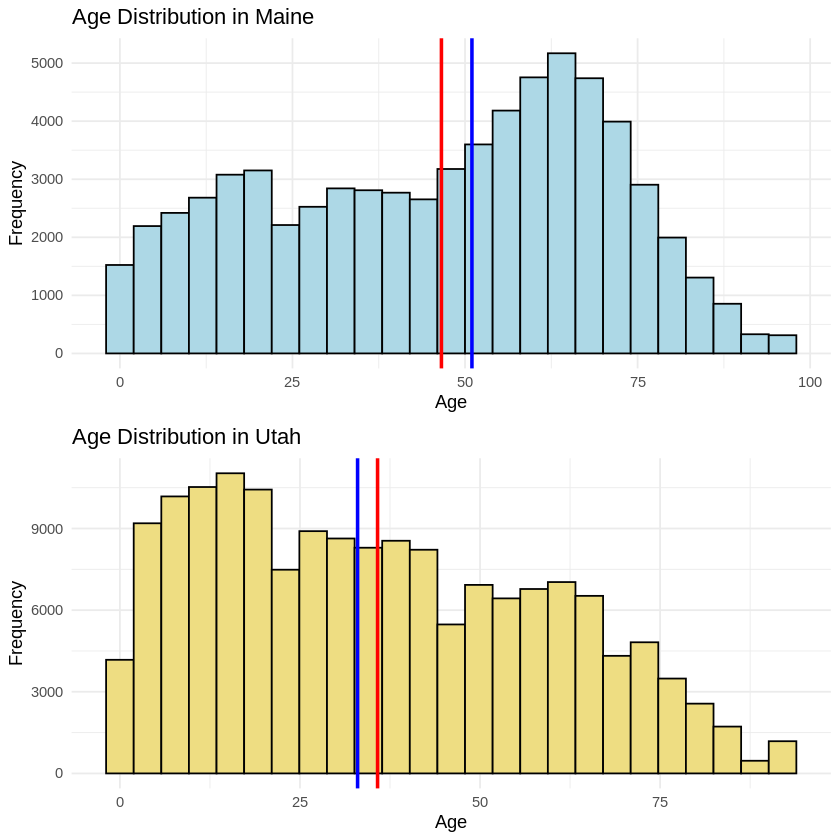

In [99]:
# histogram of Maine age distribution
hist_maine <- ggplot(filter(dat, STATEFIP == 23), aes(x = AGE)) +
  geom_histogram(bins = 25, fill = "lightblue", color = "black") +
  labs(title = "Age Distribution in Maine", x = "Age", y = "Frequency") +
  geom_vline(xintercept = mean(filter(dat, STATEFIP == 23)$AGE, na.rm = T), color = "red", linewidth = 1) +
  geom_vline(xintercept = median(filter(dat, STATEFIP == 23)$AGE, na.rm = T), color = "blue", linewidth = 1) +
  theme_minimal()
    
# histogram of Utah age distribution
hist_utah <- ggplot(filter(dat, STATEFIP == 49), aes(x = AGE)) +
  geom_histogram(bins = 25, fill = "lightgoldenrod", color = "black") +
  labs(title = "Age Distribution in Utah", x = "Age", y = "Frequency") +
  geom_vline(xintercept = mean(filter(dat, STATEFIP == 49)$AGE, na.rm = T), color = "red", linewidth = 1) +
  geom_vline(xintercept = median(filter(dat, STATEFIP == 49)$AGE, na.rm = T), color = "blue", linewidth = 1) +
  theme_minimal()

# arrange the histograms in two rows
grid.arrange(hist_maine, hist_utah, nrow = 2)

Viewing the two histograms shows us that these two states have very different age demographics.  The largest age group in Maine appears to be in the range of about 50 to 75 while the largest age group in Utah appears to be 25 and younger.

### 2b. Box Plots

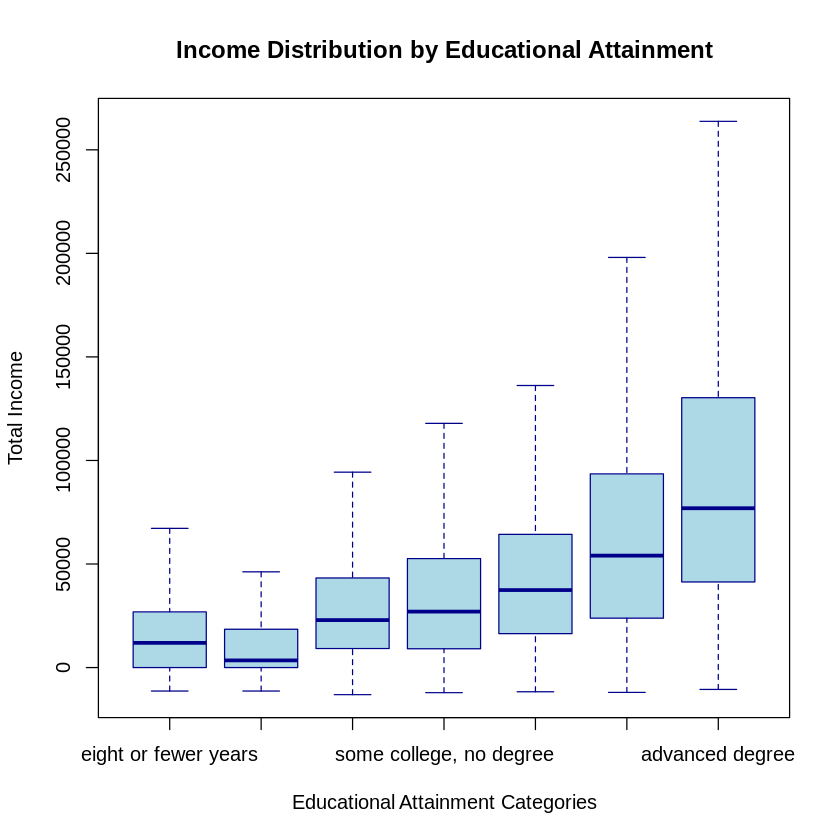

In [95]:
boxplot(INCTOT ~ EDUC_RECODE, data = dat,
        main = "Income Distribution by Educational Attainment",
        xlab = "Educational Attainment Categories",
        ylab = "Total Income",
        col = "lightblue",      # fill color for the boxes
        border = "darkblue",    # border color for the boxes
        outline = FALSE)        # excludes outliers for a cleaner look

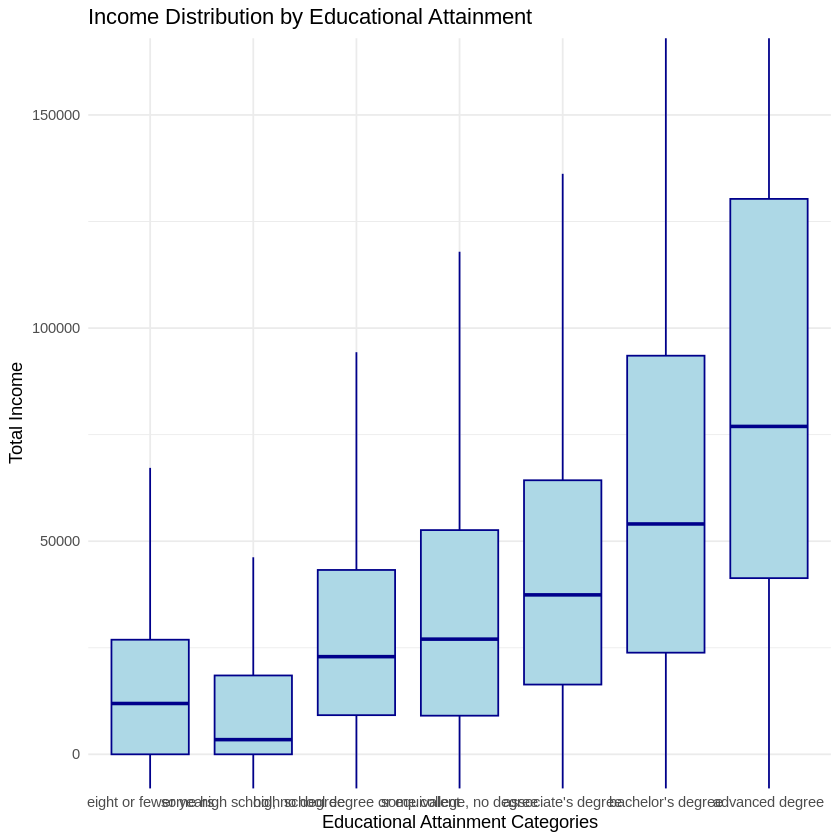

In [112]:
y_limit <- quantile(dat$INCTOT, 0.95, na.rm = T)

dat %>%
filter(!is.na(INCTOT)) %>%
ggplot(aes(x = EDUC_RECODE, y = INCTOT)) +
  geom_boxplot(fill = "lightblue", color = "darkblue", outlier.shape = NA) +
  labs(title = "Income Distribution by Educational Attainment",
       x = "Educational Attainment Categories",
       y = "Total Income") +
  coord_cartesian(ylim = c(0, y_limit)) +
  theme_minimal()

### 2c. Scatter Plots

In [ ]:
plot(dat$AGE)

In [ ]:
ggplot2::geom_point()

### 2d. Density Plots:

In [ ]:
ggplot2::geom_density()

## 3. Correlation Analysis

### 3a. Correlation Matricies

In [ ]:
cor()

In [ ]:
corrplot::corrplot()

### 3b. Heatmaps

In [ ]:
GGally::ggpairs()

## 4. Outlier Detection

In [ ]:
boxplot()

In [ ]:
dplyr::filter()

In [ ]:
ggplot2::geom_boxplot()

## 5. Categorical Variable Analysis

In [ ]:
table()

In [ ]:
prop.table()

In [ ]:
ggplot2::geom_bar

## 5. Exploring Relationships in Depth

### Exploring Educational Attainmennt by Age Group

Taking a look at the education information, you might notice that there seem to be a suprisingly high number of individuals with very little education.

In [2]:
calculate_percentage(dat, EDUC_RECODE)

ERROR: Error in calculate_percentage(dat, EDUC_RECODE): could not find function "calculate_percentage"


25.01% (16.57% + 8.44%) of the population has not completed a high school degree or equivalent! This seems very high for 2017-2022. A quick search shows us that in 2021 only 8.9% of the population had less than a high school degree or equivalent.

That number is way too high because we have children in the sample! Our review of the AGE variable, showed us that many of the individuals in this sample are too young to have even started school, let alone complete a degree. Unless we are specifically intersted in tracking educational attainment for children, it probably isn't very useful to include children when we analyze the EDUC_RECODE variable.

When exploring educational attainment, it's common to only look at individuals aged 25 and older and if you clicked the link above you may have noticed that the website specifies that the 8.9% statistic is for ages 25 and older. Population level educational attainment research is usually focused on high school completion and college completion and, for the most part, individuals usually complete these degrees by age 25 if they plan to complete them at all.

Let's take another look at the education variable, but restricting to only individuals aged 25 or older. We are also excluding the missing (N/A) category for this view and focus only on the individuals for which we have educational attainment information.

In [ ]:
calculate_percentage(filter(dat, AGE >= 25 & !is.na(EDUC_RECODE)), EDUC_RECODE)

After restricing the data to only individuals aged 25 or older we can see that only 10.31% (4.35% + 5.96%) have not achieved a high school degree or equivalent.  This is close to the statistic provided above and makes much more sense given contemporary educational attainment rates.

We can dig even deeper and compare age category and educational attainment category.

First we will make a new helper function to produce cross-tabulations with percents.

In [ ]:
calculate_percentage_cross_tab <- function(data, var1, var2) {
  data %>%
    count({{ var1 }}, {{ var2 }}) %>%
    group_by({{ var1 }}) %>%
    mutate(Percentage = n / sum(n) * 100) %>%
    ungroup()
}

Then we can take a look at educational attainment by age category.

In [ ]:
calculate_percentage_cross_tab(filter(dat, AGE >= 25), AGE_CAT, EDUC_RECODE) %>% print(n = Inf)

This cross-tabulation shows us that younger adults are completing more education than the older generations.  Fewer members of the younger generation have not completed high school and more have completed a bachelor's degree.

Percent of the population with no high school diploma or equivalent:
* 8.68% (3.17% + 5.51%) of the 25-44 population
* 10.25% (4.30% + 5.95%) of the 45-64 population
* 12.20% (5.74% + 6.46%) of the 65+ population

Percent of the population with a Bachelor's degree or more:
* 40.6% (25.7% + 14.9%) of the 25-44 population
* 36.6% (20.0% + 13.6%) of the 45-64 population
* 30.0% (16.3% + 13.7%) of the 65+ population

Let's use *ggplot* to create a stacked bar chat showing educational attainment category by age group.

In [ ]:
# stacked bar chart comparing age groups and educational attainment
ggplot(filter(dat, AGE >= 25), aes(x = AGE_CAT, fill = EDUC_RECODE)) +
  geom_bar(position = "fill") +
  labs(title = "Educational Attainment by Age Group",
       x = "Age Group",
       y = "Proportion",
       fill = "Educational Attainment") +
  scale_y_continuous(labels = scales::percent_format()) +
  theme_minimal()

The stacked bar chart confirms what we saw in the cross-tabulation and shows a shift of educational attainment by generation.  The most common educational attainment level for individuals aged 25-44 is a Bachelor's degree compared to a high school degree or equivalent for individuals aged 65+.

Let's break this down further by exploring these trends seperately for men and women.

In [ ]:
# stacked bar chart comparing age groups and educational attainment (men only)
ggplot(filter(dat, AGE >= 25 & SEX == 1), aes(x = AGE_CAT, fill = EDUC_RECODE)) +
  geom_bar(position = "fill") +
  labs(title = "Men's Educational Attainment by Age Group",
       x = "Age Group",
       y = "Proportion",
       fill = "Educational Attainment") +
  scale_y_continuous(labels = scales::percent_format()) +
  theme_minimal()

# stacked bar chart comparing age groups and educational attainment (women only)
ggplot(filter(dat, AGE >= 25 & SEX == 2), aes(x = AGE_CAT, fill = EDUC_RECODE)) +
  geom_bar(position = "fill") +
  labs(title = "Women's Educational Attainment by Age Group",
       x = "Age Group",
       y = "Proportion",
       fill = "Educational Attainment") +
  scale_y_continuous(labels = scales::percent_format()) +
  theme_minimal()

This comparison shows us that a lot of this shift in educational attainment we are seeing is due to a shift in women's educational attainment specifically.  While men's educational attainment has also changed, the difference between age groups is not nearly as significant as it is for women.

We also see interesting differences between men's and women's educational attainment.  Let's take a look at the cross-tabulations for men and women seperately.

In [ ]:
# men only
calculate_percentage_cross_tab(filter(dat, AGE >= 25 & SEX == 1), AGE_CAT, EDUC_RECODE) %>% print(n = Inf)

In [ ]:
# women only
calculate_percentage_cross_tab(filter(dat, AGE >= 25 & SEX == 2), AGE_CAT, EDUC_RECODE) %>% print(n = Inf)

In [ ]:
There are some interesting differences in educational attainment for men compared to women.  In general, women in the youngest generation are completing more education than their male counterparts.

Percent of the 25-44 population with no high school diploma or equivalent:
* 10.22% (3.55% + 6.67%) of men aged 25-44
* 7.11% (2.78% + 4.33%) of women aged 25-44

Percent of the 25-44 population with a Bachelor's degree or more:
* 35.8% (23.5% + 12.3%) of men aged 25-44
* 45.5% (27.9% + 17.6%) of women aged 25-44

## Initial Exploratory Data Analysis (EDA)